# Random Forest

In [194]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from pprint import pprint

In [195]:
X = pd.read_csv("table_7.csv")
y = X['target_mood']

# Data

In [196]:
#fill in with 0 all the NaN
X.fillna(0, inplace =True)
X.describe()

,p31,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,p19,p15,p5,p20,p24,p13,p33,p29,p25,p8
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,0.034640,6.993289,0.471225,0.677944,0.122743,17889.691174,9.807657,6.973694,4583.934327,7927.983185,...,0.035552,0.042844,0.041933,0.032817,0.044667,0.041933,0.035552,0.032817,0.021878,0.048314
std,0.182949,0.504513,0.115031,0.064690,0.076968,11085.613003,5.549894,3.708287,5503.547583,5549.641464,...,0.185254,0.202598,0.200526,0.178238,0.206667,0.200526,0.185254,0.178238,0.146351,0.214526
min,0.000000,4.961905,0.186310,0.442262,0.015550,691.638858,2.285714,2.000000,-30604.373571,112.184143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.778571,0.394643,0.637500,0.077427,9148.501714,6.000000,3.857143,1302.603857,4082.840571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.028571,0.463690,0.687500,0.102262,16734.774857,8.571429,6.000000,3100.714286,6796.883571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7.285714,0.555357,0.728571,0.135071,24882.852859,12.428571,9.000000,5741.493429,10404.828429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.233333,0.741071,0.853571,0.440491,51824.628430,33.428571,24.428571,30026.592429,33745.471714,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
# del data['period']

# scaler = MinMaxScaler(feature_range=(-1, 1))
# target = scaler.fit_transform(np.array(data['target_mood'], dtype = float).reshape(-1, 1))


# del data['target_mood']
# colnames = data.columns
# data = scaler.fit_transform(np.array(data, dtype = float))
# X = pd.DataFrame(data)
# X.columns = colnames

In [198]:
print len (y)

1097


# Training and Tests

In [199]:
#drop var
# del X['appCat.finance']
# del X['appCat.finance']
y = X['target_mood']
X = X.drop(['p1', 'p2', 'p3', 'p5', 'p6', 'p7','p8', 'p9', 'p12', 'p13', 'p14', 'p15','p16', 'p17', 'p19', 'p20', 'p23','p24', 'p25','p26', 'p27', 'p28', 'p29', 'p30','p31', 'p32', 'p33','appCat.finance', 'appCat.game', 'appCat.weather','mon','tue','wed','thu','fri','sat','sun','appCat.unknown','appCat.office','appCat.utilities','appCat.other','appCat.communication','appCat.builtin','call','screen','appCat.travel','appCat.social','sms','target_mood','period' ], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training size :{}; Test size: {}".format(len(X_train),len(X_test)))

Training size :877; Test size: 220


# Establish Baseline

In [200]:
# The baseline predictions are the historical averages
baseline_preds = X['mood']

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

('Average baseline error: ', 0.47, 'degrees.')


# Train the model

In [201]:
# Initiate model 
rf = RandomForestRegressor(n_estimators= 100, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

In [202]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Make predictions on the tests

In [203]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 0.43, 'degrees.')


# Determine Performance Matrix

In [204]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 93.61, '%.')


# Visualizing a Single Decision Tree

In [205]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

X_list = list(X.columns)
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [206]:
print('The depth of this tree is:', tree.tree_.max_depth)

('The depth of this tree is:', 22)


In [207]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

# Variable Importance

In [208]:
#Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
print 'Most important features: %s' %feature_importances
#[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

Most important features: [('mood', 0.44), ('appCat.entertainment', 0.15), ('circumplex.arousal', 0.14), ('circumplex.valence', 0.14), ('activity', 0.13)]


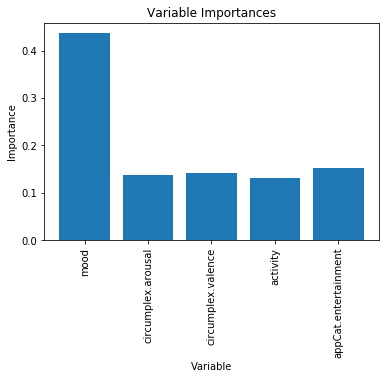

In [209]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Prediction and Actual Values

In [210]:
# Features of training values
moods = X['mood']
#builtins = X['appCat.builtin']
#unknowns = X['appCat.unknown']

# List of features
#features = [str(int(mood)) + '-' + str(int(builtin)) + '-' + str(int(unknown)) for mood, builtin, unknown in zip(moods, builtins, unknowns)]

# Dataframe with true values 
true_data = pd.DataFrame(data = {'mood': moods, 'actualmood': y})

# Features of predictions
test_moods = X_test['mood']
#test_builtins = X_test['appCat.builtin']
#test_unknowns = X_test['appCat.unknown']

# Column of features
#test_features = [str(int(mood)) + '-' + str(int(builtin)) + '-' + str(int(unknown)) for mood, builtin, unknown in zip(moods, builtins, unknowns)]


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'mood': test_moods, 'prediction': predictions})

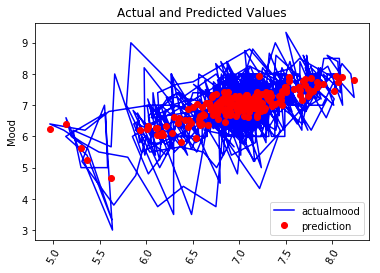

In [213]:
# Plot the actual values
plt.plot(true_data['mood'], true_data['actualmood'], 'b-', label = 'actualmood')

# Plot the predicted values
plt.plot(predictions_data['mood'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel(''); plt.ylabel('Mood'); plt.title('Actual and Predicted Values');

# Random Hyperparameter Grid

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Random Search Training

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tunet
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28, total=   3.8s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28, total=   3.8s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=400, min_samples_split=5, max_features=sqrt, max_depth=28 
[

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28, total=  25.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28, total=  25.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28, total=  26.3s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28, total=  28.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=28, total=  27.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=2, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False

[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  10.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55, total=   7.3s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55, total=   6.8s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  10.9s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=sqrt, max_depth=55 
[CV]  bootstrap=False, min

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64, total=   3.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64, total=   3.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=5, max_features=auto, max_depth=10, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64, total=   3.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_s

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10, total=  15.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10, total=  13.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10, total=  13.9s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1600, min_samples_split=5, max_features=sqrt, max_depth=10, total=  13.6s
[CV] bootstrap=False

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.9min


[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46, total=  19.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46, total=  21.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46, total=  20.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=64 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1800, min_samples_split=2, max_features=auto, max_depth=46, total=  20.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=64 
[CV]  bootstrap=False,

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73, total=   6.2s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73, total=   6.3s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73, total=   6.0s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=600, min_samples_split=5, max_features=auto, max_depth=73, total=   6.1s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73, total=  10.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73, total=  10.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73, total=  11.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1400, min_samples_split=5, max_features=sqrt, max_depth=73, total=  11.1s
[CV] bootstrap=True, min_sam

[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None, total=   4.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None, total=   4.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=37 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None, total=   4.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=37 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None, total=   4.3s
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=400, min_samples_split=2, max_features=sqrt, max_depth=None, total=   4.4s

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19, total=  14.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=91, total=  27.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=10, max_features=auto, max_depth=91, total=  30.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=2, max_features=sqrt, max_depth=19, total=  15.3s
[CV] bootstrap=True, min

[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91, total=  13.2s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91, total=  17.4s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91, total=  17.5s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=False, min_samples_leaf=1, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=91, total=  17.9s
[CV] bootstrap=True, min_sam

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.8min


[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=19, total=   8.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=19, total=   8.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=19, total=   8.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19, total=  11.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min

[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55, total=   8.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55, total=   8.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55, total=   7.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55, total=   7.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=55 
[CV]  bootstrap=True, min_sa

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=82, total=   6.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=82, total=   6.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=82, total=   6.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=82, total=   6.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=400, min_samples_split=10, max_features=sqrt, max_depth=82 
[CV]  bootstrap=True, min_samples

[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1000, min_samples_split=2, max_features=sqrt, max_depth=100, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82, total=  21.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82, total=  20.8s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82, total=  20.7s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_s

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100, total=   5.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100, total=   6.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100, total=   6.0s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=100, total=   6.2s
[CV] bootstrap=False

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=46, total=  10.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=46, total=  10.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=46, total=  10.7s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=46, total=  10.6s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=28 
[CV]  bootstrap=

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10, total=  16.1s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10, total=  16.3s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10, total=  16.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=10, total=  16.7s
[CV] bootstrap=True, min_sam

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73, total=  13.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73, total=  13.1s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=10, max_features=sqrt, max_depth=73, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=46 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=200, min_samples_split=2, max_features=sqrt, max_depth=46, total=   1.8s
[CV] bootstrap=True, min

[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=73, total=  12.6s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=73, total=  12.8s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None, total=  15.7s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=2, n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=None, total=  15.3s


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 32.9min


[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19, total=  15.3s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19, total=  15.3s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19, total=  16.0s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19, total=  15.9s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=10, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64, total=  14.3s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64, total=  14.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64, total=  16.1s
[CV] bootstrap=False, min_samples_leaf=1, n_estimators=1000, min_samples_split=10, max_features=sqrt, max_depth=73 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=1400, min_samples_split=2, max_features=auto, max_depth=64, total=  16.0s
[CV] bootstrap=False, min_

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1400, min_samples_split=2, max_features=sqrt, max_depth=73, total=  12.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1400, min_samples_split=2, max_features=sqrt, max_depth=73, total=  12.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=1400, min_samples_split=2, max_features=sqrt, max_depth=73, total=  12.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=19, total=   6.9s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, mi

[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82, total=  15.2s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=1600, min_samples_split=5, max_features=auto, max_depth=82 
[CV]  bootstrap=True, min_sa

[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  16.7s
[CV] bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  16.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  17.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=1000, min_samples_split=5, max_features=sqrt, max_depth=10 
[CV]  bootstrap=True, min_samples_leaf=1, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=91, total=  17.4s
[CV] bootstrap=True, min_sam

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91, total=   6.0s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91, total=   6.2s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91, total=   6.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=600, min_samples_split=10, max_features=auto, max_depth=91, total=   7.2s
[CV] bootstrap=True, min_sam

[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64, total=   7.5s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64, total=   7.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64, total=   7.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64, total=   7.0s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=800, min_samples_split=5, max_features=sqrt, max_depth=64 
[CV]  bootstrap=False, min_s

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=2, max_features=sqrt, max_depth=73, total=  14.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, min_samples_split=2, max_features=sqrt, max_depth=73, total=  14.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91, total=   6.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91, total=   6.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=800, min_samples_split=10, max_features=sqrt, max_depth=91 
[CV]  bootstrap=True, min_sa

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None, total=  20.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None, total=  20.1s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None, total=  19.8s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=2000, min_samples_split=5, max_features=sqrt, max_depth=None, total=  20.1s
[CV]

[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28, total=   5.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28, total=   5.4s
[CV] bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28, total=   5.4s
[CV] bootstrap=False, min_samples_leaf=2, n_estimators=400, min_samples_split=10, max_features=auto, max_depth=37 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=600, min_samples_split=2, max_features=sqrt, max_depth=28, total=   5.3s
[CV] bootstrap=False, min_s

[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=91, total=   3.4s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=False, min_samples_leaf=4, n_estimators=200, min_samples_split=5, max_features=auto, max_depth=91, total=   2.6s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19, total=  22.9s
[CV] bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19 
[CV]  bootstrap=True, min_samples_leaf=2, n_estimators=2000, min_samples_split=2, max_features=sqrt, max_depth=19, total=  22.8s
[CV] bootstrap=True, min_sam

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 49.8min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [21]:
rf_random.cv_results_

/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda2/lib/python2.7/site-packages/sklearn/utils/

{'mean_fit_time': array([ 3.3118418 , 15.76109431, 11.62896297, 24.83626168, 11.59969881,
         6.26564145,  8.9829875 ,  6.70438864, 13.56462181, 18.1565932 ,
         3.5904721 ,  7.34446089, 18.66728919, 15.84593012,  7.0976109 ,
        20.37860539,  7.14552538,  8.66543851, 20.46931481,  5.81515806,
        15.80868227, 19.89404998, 10.82615111, 17.43652117, 13.85119364,
         4.59759142, 26.76992121,  8.67173057, 22.82127626, 13.68115673,
        13.59792812,  8.76250551, 13.3317528 ,  8.31769738, 17.18317752,
         9.01784942, 11.81086056,  8.44391942,  7.72428608,  7.88723459,
         1.76208842,  4.5918576 ,  6.00907454,  3.04510593,  4.29238274,
        10.17336848, 20.33885324,  3.60294447, 10.91547048,  5.8097796 ,
        24.94510221, 22.18859737, 10.70032549, 10.81868038, 12.30811167,
         5.32201483, 15.5711139 , 22.57508917, 21.04409244, 11.88745637,
         1.69000154,  4.05023701, 12.77200141, 15.81641579, 15.16959529,
        16.31438379, 21.03140898, 

# Evaluate 

In [22]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [23]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(X_train,  y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4262 degrees.
Accuracy = 93.60%.


In [24]:
#evaluate best random
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.4407 degrees.
Accuracy = 93.40%.


In [25]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.21%.


# Grid Search with Cross Validation

In [26]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000, 1600, 1200, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80, total=   8.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80, total=   8.9s
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80, total=   8.9s
[C

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  15.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  15.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  15.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimat

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=80, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=80, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80, total=  15.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80, total=  15.6s
[CV] bootstrap=True, min_samples_leaf=3, n_e

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=  11.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=  11.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=  14.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=  14.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=80, total=  11.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=80, total=  12.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80, total=   9.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=80, total=  12.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimator

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.6min


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  18.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=80, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estima

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=80, total=   9.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80, total=  14.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80, total=  14.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=80, total=  14.7s
[CV] bootstrap=True, min_samples_leaf=4, n_e

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=   9.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=   9.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=   9.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=80, total=  10.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=80, total=  11.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=80, total=  11.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80, total=   8.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=80, total=   8.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimator

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80, total=  15.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80, total=  15.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80, total=  14.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80, total=  14.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80, total=   9.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80, total=   9.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80, total=   8.8s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=80, total=  13.8s
[CV] bootstrap=True, min_samples_leaf=5, n_e

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 18.4min


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=80, total=  20.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80, total=  13.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80, total=  13.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=80, total=  23.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estima

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  25.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  24.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  24.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  24.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimato

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=80, total=  11.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=80, total=  11.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=80, total=  11.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80, total=  21.6s
[CV] bootstrap=True, min_samples_leaf=3, n_e

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80, total=  11.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80, total=  11.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80, total=  11.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80, total=  11.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=80, total=  14.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=80, total=  14.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=80, total=  14.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=80, total=  14.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimator

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80, total=  14.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80, total=  14.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80, total=  14.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80, total=  14.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80, total=  12.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80, total=  12.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80, total=  12.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=4, n_e

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80, total=   8.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80, total=  17.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80, total=  17.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80, total=   8.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estima

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  17.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  17.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  17.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  17.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estima

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 36.1min


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  18.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=80, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80, total=  10.2s
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_es

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80, total=  16.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80, total=  16.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=80, total=  16.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=80, total=   9.3s
[CV] bootstrap=True, min_samples_leaf=5, n_e

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=80, total=   9.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80, total=  16.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80, total=  16.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80, total=  16.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=5, n_

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.7s
[CV] bootstrap=True, min_samples_leaf=3, n_e

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100, total=  12.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100, total=  12.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100, total=   9.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100, total=  13.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100, total=  13.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100, total=  13.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100, total=  13.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=100, total=   7.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=100, total=   7.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=100, total=   7.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=100, total=  12.2s
[CV] bootstrap=True, min_samples_leaf=4, n_e

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=100, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.8s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100, total=  15.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100, total=  15.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100, total=  15.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100, total=   7.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=100, total=   9.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  17.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  17.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  17.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=100, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=5, n_e

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 54.8min


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=100, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100, total=  16.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=100, total=  16.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100, total=   8.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100, total=   8.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  14.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  15.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=100, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=100, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  16.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  16.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  16.9s
[CV] bootstrap=True, min_samples_leaf=3, n_e

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  10.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  11.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  12.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  17.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  21.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  15.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100, total=  11.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100, total=  13.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100, total=  13.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100, total=  13.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=100, total=  12.9s
[CV] bootstrap=True, min_samples_leaf=4, n_e

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=100, total=   9.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=100, total=   9.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=100, total=   9.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=100, total=   9.3s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=100, total=  24.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=100, total=  23.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100, total=  11.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100, total=  10.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100, total=  20.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100, total=  20.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100, total=  20.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=100, total=  20.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=100, total=  13.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  21.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  20.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=100, total=  20.6s
[CV] bootstrap=True, min_samples_leaf=5, n_e

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  12.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  12.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  12.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=100, total=  12.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  13.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  13.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=100, total=  13.8s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100, total=  10.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 81.6min


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  15.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  16.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  16.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   8.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   8.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   8.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   9.1s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110, total=   8.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=110, total=  16.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=110, total=  16.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110, total=   7.9s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  15.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  15.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  15.4s
[CV] bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=110, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=110, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=8, max_depth=110, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=110, total=  17.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=2000, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110, total=   8.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110, total=   8.9s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110, total=   9.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=10, max_depth=110, total=   8.9s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=110, total=  13.0s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=110, total=  12.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=110, total=  12.6s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=2, min_samples_split=12, max_depth=110, total=  12.5s
[CV] bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  16.8s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  17.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  18.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110, total=  17.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   7.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   7.2s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   7.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=2, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=10, max_depth=110, total=   8.1s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110, total=   8.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=110, total=  17.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=10, max_depth=110, total=  18.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=110, total=   9.9s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  16.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  16.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  16.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=2, min_samples_split=12, max_depth=110, total=  16.5s
[CV] bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=110, total=  14.7s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=110, total=  14.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=8, max_depth=110, total=  14.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110, total=  32.5s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  11.8s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  12.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  12.6s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  12.7s
[CV] bootstrap=True, min_samples_lea

[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  15.0s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  14.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  14.4s
[CV] bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110, total=  15.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110, total=  16.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110, total=  16.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_

[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=   9.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=   9.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=   9.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=   9.9s
[CV] bootstrap=True, min_samples_lea

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 111.5min


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=110, total=  16.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=10, max_depth=110, total=  16.2s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  13.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110, total=  13.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1200, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  16.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  16.7s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  15.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110, total=  15.5s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1600, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_le

[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=110, total=  10.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=110, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=110, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1600, max_features=3, min_samples_split=8, max_depth=110, total=  13.5s
[CV] bootstrap=True, min_samples_leaf=5, n_e

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=8, max_depth=110, total=  18.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=  10.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110, total=   9.3s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_lea

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=110, total=  19.0s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=110, total=  18.8s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=10, max_depth=110, total=  18.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=110, total=  10.9s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_le

[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1200, max_features=3, min_samples_split=12, max_depth=110, total=  17.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110, total=  34.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110, total=  33.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110, total=  33.7s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=2000, max_features=3, min_samples_split=12, max_depth=110 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 123.9min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 1600}

In [28]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.4450 degrees.
Accuracy = 93.34%.


In [35]:
import numpy
numpy.savetxt("predictions.csv", predictions, delimiter=",",fmt='%10.5f')


[7.02263333 7.04755    7.0883     7.26201667 7.02275    7.32866667
 6.38275    6.97763333 5.78016667 7.06071667 6.96913333 7.09985
 7.0667     6.86175    6.34653333 7.03155    7.1647     6.77738333
 6.19163333 7.11633333 6.97308333 7.43876667 7.593      6.96241667
 6.1654     7.3441     7.08471667 5.3135     7.62       6.62918333
 6.90081667 6.80823333 6.57825    6.08816667 7.03008333 6.80206667
 7.13601667 6.93271667 6.02556667 7.08545    5.60366667 7.01241667
 6.84868333 6.83275    6.91765    7.05756667 6.955      7.33795
 6.92165    7.15761667 7.00976667 7.4507     7.26818333 7.11851667
 6.37486667 6.38908333 6.36186667 6.88965    6.84413333 7.34671667
 7.7275     6.99338333 6.71333333 7.2537     6.9915     6.96658333
 6.55746667 7.86535    7.3225     6.90031667 7.20943333 7.27708333
 6.96813333 6.81478333 7.41643333 6.8859     7.47241667 7.03276667
 7.00886667 6.98795    7.62131667 6.87053333 6.85655    7.13648333
 6.78866667 7.22958333 7.06401667 6.87206667 7.85083333 7.09215
 6.9

In [214]:
true_data = pd.DataFrame(data = {'mood': moods, 'actualmood': y})
true_data.to_csv('actual.csv', sep='\t', encoding='utf-8')
predictions_data = pd.DataFrame(data = {'mood': test_moods, 'prediction': predictions})
predictions_data.to_csv('predictions.csv',sep='\t', encoding='utf-8')